# 探索虚拟水贸易的复杂性

In [1]:
import sys
sys.path.append("..")

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from module.trade_table import TradeTable
from tools.common_used import yellow_river_provinces, export_virtue_water_matrix, ENG_NAME
from tools.plot_gam import plot_gam_and_interval

total = pd.read_csv(r"../data/interim/total_nvwi_inner.csv")

# 蓝水和绿水的意义不大目前看起来
# green = pd.read_csv(r"../data/interim/green_nvwi_inner.csv")
# blue = pd.read_csv(r"../data/interim/blue_nvwi_inner.csv")

total.head()

,Province Name,Province Code,Year,Wheat,Maize,Rice,Sorghum,Barley,Millet,Potato,...,Sugarbeet,Sugarcane,Cotton,Spinach,Tomato,Cabbage,Apple,Grape,Tea,Tobacco
0,Beijing,1,1979,74.210679,-202.548988,2167.611662,61.573556,25.898248,29.656194,60.822362,...,11.277791,31.530283,116.525242,-0.104435,5.044138,-0.115169,28.187313,-0.193126,36.908690,15.343575
1,Beijing,1,1980,348.485893,-469.240228,2008.891652,53.501047,32.405392,22.104911,45.497017,...,14.678364,29.944721,29.906058,-0.240176,4.356198,0.569861,29.046517,-0.241483,24.442461,11.350282
2,Beijing,1,1981,175.224922,-444.356016,2131.742579,59.675153,26.896964,17.714209,50.540135,...,15.156194,34.371399,129.736882,-0.482566,5.245837,0.518346,34.524341,-0.265388,27.687077,8.326199
3,Beijing,1,1982,289.229720,-561.901821,2040.696637,58.443023,24.713817,22.545120,58.807665,...,14.813250,42.501599,251.251187,-0.489691,5.228399,0.859771,35.401587,-0.332403,28.831569,19.395867
4,Beijing,1,1983,243.458895,-423.612109,2111.827123,48.704464,27.112838,28.133320,51.146220,...,18.288732,52.172649,376.820049,-0.385395,5.030235,0.818365,27.018137,-0.391425,29.650808,14.111434


## 黄河流域的虚拟水贸易复杂性
$$ RCA_{cp} = \frac{\frac{D_{cp}}{\sum_p{D_{cp}}}}{\frac{\sum_c{D_{cp}}}{\sum_{cp}D_{cp}}} $$

- 分子：国家C通过出口产品P获得的收益 / 该国家出口所有产品获得的总收益
- 分母：所有国家出口产品P所获得的总收益 / 所有国家、所有产品 出口的总收益

In [2]:
# 对逐年黄河流域复杂度的变化进行作图

def get_all_index_results(data):
    """
    params: data, total? green? blue?
    return: 各省的复杂性指数
    """
    result = pd.DataFrame(index=total['Province Name'].unique())
    for y in data.Year.sort_values().unique():
        matrix = export_virtue_water_matrix(data, y)
        index = TradeTable(matrix).calculate_genepy_index()
        result[y] = index
    return result

result = get_all_index_results(total)
result.head()

,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
Beijing,NaN,0.023836,0.021637,0.028343,0.024229,0.027126,0.013074,0.011611,0.011570,0.010096,...,0.018980,0.017238,0.016990,0.024745,0.012844,0.003790,NaN,0.002915,0.003489,NaN
Tianjin,0.053514,0.032630,0.029723,0.034417,0.030018,0.035143,0.039387,0.037499,0.048288,0.036405,...,0.025978,0.028059,0.030333,0.037930,0.025734,0.025388,0.021277,0.022861,0.027296,0.022629
Hebei,0.075066,0.061161,0.061486,0.059828,0.071699,0.064184,0.064394,0.080560,0.058912,0.067455,...,0.043412,0.047908,0.039205,0.055272,0.088128,0.063325,0.071452,0.048899,0.063059,0.073241
Shanxi,0.084888,0.067994,0.056606,0.068804,0.065080,0.070652,0.070737,0.063830,0.057051,0.075726,...,0.076672,0.105656,0.087427,0.085495,0.066560,0.052243,0.066169,0.058685,0.049199,0.043595
Neimeng,0.041206,0.107656,0.073979,0.070135,0.099994,0.095911,0.097307,0.094742,0.083408,0.078885,...,0.118830,0.176972,0.173355,0.107809,0.132764,0.178552,0.188828,0.210076,0.087508,0.074585


In [3]:
result.shape
result.index

from sklearn.preprocessing import normalize

result_nom = pd.DataFrame(normalize(result.fillna(0)), index=result.index, columns=result.columns)

(31, 32)

Index(['Beijing', 'Tianjin', 'Hebei', 'Shanxi', 'Neimeng', 'Liaoning', 'Jilin',
       'Heilongjiang', 'Shanghai', 'Jiangsu', 'Zhejiang', 'Anhui', 'Fujian',
       'Jiangxi', 'Shandong', 'Henan', 'Hubei', 'Hunan', 'Guangdong',
       'Guangxi', 'Hainan', 'Chongqing', 'Sichuan', 'Guizhou', 'Yunan',
       'Tibet', 'Shaanxi', 'Gansu', 'Qinghai', 'Ningxia', 'Xinjiang'],
      dtype='object')

### 黄河复杂性与全国平均值对比

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


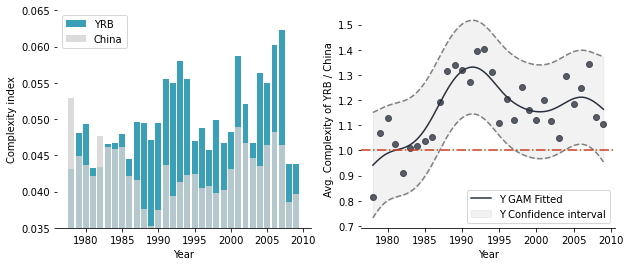

In [11]:
from tools.mk_test import mk_test

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
x = np.array(result.columns)
y_yr = result.loc[yellow_river_provinces, :].mean().values
y_all = result.mean().values

# ax.plot(x, y_all, "-o", label='Mean, {}'.format(mk_test(y_all)[0]), color='gray')
# ax.plot(result.columns, y_yr, "-o", color='black', label="Yellow River, {}".format(mk_test(y_yr)[0]))
# ax.plot(x, y_yr/y_all, "-o", color='black', label='ratio')

# plot_gam_and_interval(x, y_yr, ax=ax, y_label='YRB')
# plot_gam_and_interval(x, y_all, ax=ax, y_label='China')

ax1.bar(x, y_yr, label='YRB', color='#0889A6', alpha=0.8)
ax1.bar(x, y_all, color='lightgray', label='China', alpha=0.8)
ax1.set_ylim(0.035, 0.065)
ax1.legend()

plot_gam_and_interval(x, y_yr/y_all, ax=ax2)
ax2.axhline(1.0, color='#C83C1C', ls='-.')

ax1.set_xlabel('Year')
ax1.set_ylabel('Complexity index')
ax2.set_xlabel("Year")
ax2.set_ylabel("Avg. Complexity of YRB / China")

ax2.legend()

for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.savefig("../figs/complexity_index.jpg", dpi=300)
plt.show();

基本认识1: 黄河流域各省总虚拟水出口形式的复杂度总体呈现上升趋势，而全国各省的平均经济复杂度基本保持不变

这表明黄河流域的省份能够出口更多、更多样性的作物

### 各省复杂性指数对比

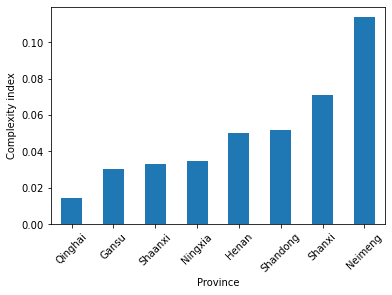

In [5]:
# 各省1978--2010平均复杂性指数
fig, ax = plt.subplots()
result.loc[yellow_river_provinces, :].T.mean().sort_values().plot.bar(rot=45, ax=ax)
ax.set_xlabel('Province')
ax.set_ylabel('Complexity index')
plt.show();

基本认识2：内蒙是复杂性最高的，青海是复杂性最差的

### 各主要流域横向对比

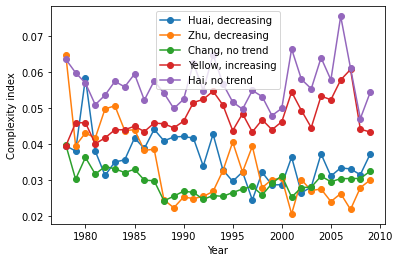

In [6]:
identify = pd.read_csv("../data/external/pnas_identified.csv", index_col=0)

# 各流域相关的省
fig, ax = plt.subplots()
x = result.columns

basin_province_dict = {}
test = []
for basin in ENG_NAME:
    provinces_included = identify[identify['MNAME_CH'] == basin]['Province_n'].unique().tolist()
    basin_province_dict[ENG_NAME[basin]] = provinces_included
    y = result.loc[provinces_included, :].mean().values
    trend = mk_test(y, 0.01)[0]
    ax.plot(x, y , "-o", label="{}, {}".format(ENG_NAME[basin], trend))
    
ax.set_xlabel('Year')
ax.set_ylabel('Complexity index')
ax.legend();

只有黄河是上升的趋势，说明黄河的农业产出越来越重要

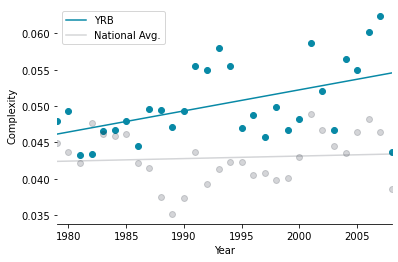

In [7]:
# 对散点获得最佳的线性拟合
def get_optmize_fit_linear(x_arr, y_arr):
    from scipy import optimize
    def linear(x, k, b):
        return k * x + b
    
    k, b = optimize.curve_fit(linear, x_arr, y_arr)[0]  # 最小二乘拟合直线
    y_simu = linear(x_arr, k, b)  # 拟合直线的预测Y
    return y_simu


# 修饰
color_err = "#29303C"
color_fill = 'lightgray'
color_yr = '#0889A6'
color_all = '#29303C'
alpha=0.2

# 作图
fig, ax = plt.subplots()

start_yr = 1979
end_yr = 2008
repeats = 5
yrs = np.arange(start_yr, end_yr + 1)

y_yr = result.loc[yellow_river_provinces, yrs].mean().values
y_all = result.loc[:, yrs].mean().values

ax.scatter(yrs, y_yr, color=color_yr)
ax.plot(yrs, get_optmize_fit_linear(yrs, y_yr), color=color_yr, label='YRB')
ax.scatter(yrs, y_all, color=color_all, alpha=alpha)
ax.plot(yrs, get_optmize_fit_linear(yrs, y_all), color=color_all, alpha=alpha, label='National Avg.')

ax.set_xlabel("Year")
ax.set_ylabel("Complexity")

ax.set_xlim(start_yr, end_yr)
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.xaxis.grid(color='lightgray', linestyle='-.', linewidth=0.5)

plt.savefig("../figs/complexity.jpg", dpi=300)
plt.show();

In [8]:
yrs.shape
y_yr.shape

(30,)

(30,)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


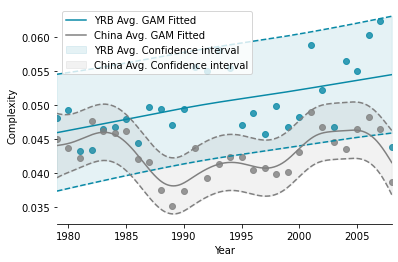

In [9]:
fig, ax = plt.subplots()
plot_gam_and_interval(yrs, y_yr, ax=ax, main_color="#0889A6", err_color="#0889A6", width=.9, y_label='YRB Avg.')
plot_gam_and_interval(yrs, y_all, ax=ax, width=.9, y_label='China Avg.', main_color='gray')

## 修饰图片
ax.set_xlabel("Year")
ax.set_ylabel("Complexity")

ax.set_xlim(start_yr, end_yr)
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.xaxis.grid(color='lightgray', linestyle='-.', linewidth=0.5)

plt.savefig("../figs/complexity.jpg", dpi=300)
plt.show();

In [10]:
yellow_river_provinces

['Henan',
 'Shandong',
 'Shanxi',
 'Shaanxi',
 'Gansu',
 'Ningxia',
 'Neimeng',
 'Qinghai']